# 1. Attribute selection in classification problems

### Curse of dimensionality

**Question** What is "Curse of dimensionality". What does it mean in practice?

**Question** How can we reduce the number of attributes in classification problems?


In [7]:
# - intuition in plenty demension fail. (example in circles write in squre)
# - complexity of problem in context of dimesions grows exponontialy. 
# In pratice it means that more featers can performe worst than less features.
# We can find the featurs that have the biggest impact in separete and choose ony them. 

The following code fragment reads the dataset containing information about the recording of brain activity of people.
Each row contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The train and test split and standarization is already done. 
Your task is to classify the given data with k-NN with k=3 (as during previous laboratories) and measure the accuracy.

Next, try to eliminate the redundant attributes. Reduce the number of attributes to 30. Use the SelectKBest class. Remember to fit it only on train data. To reduce the test data to the obtain only remained parameters use transform method on fit SelectKBest object. Use mutual_info_classif measure to assess the relevance of attributes.


In [8]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

data = pd.read_csv("seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [9]:
#TODO yoy are given data in X_train, X_test, y_train, y_test variables
from sklearn import metrics

Knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred = Knn.predict(X_test)

print("Accuracy:",accuracy_score(y_test, y_pred))



Accuracy: 0.4785243741765481


In [10]:
selectkbeast = SelectKBest(mutual_info_classif, k=30).fit(X_train, y_train)

X_train_new = selectkbeast.transform(X_train)
X_test_new = selectkbeast.transform(X_test)

Knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_new, y_train)
y_pred = Knn.predict(X_test_new)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("best features: ", selectkbeast.get_feature_names_out())


Accuracy: 0.47378129117259554
best features:  ['x1' 'x14' 'x16' 'x30' 'x31' 'x36' 'x38' 'x40' 'x42' 'x43' 'x51' 'x53'
 'x70' 'x100' 'x110' 'x111' 'x124' 'x125' 'x126' 'x127' 'x142' 'x156'
 'x157' 'x158' 'x161' 'x165' 'x166' 'x167' 'x174' 'x175']


In the exercice above we set the number of features arbitrarily. 

**Question** How can find the optimal number of attributes in machine learning problems?

In [11]:
# We can use binary search. 

# 2. Clustering

**Question** What is clustering? What can we achieve with clustering?

**Question** What clustering algorithms do you know?

In [12]:
# grouping a set of objects that objects in the same group are more similar to each other than to those in other groups. Number of cluster is not given.
# K-Means

# 3. K-means algorithm

**Question** What are the following steps of the k-means algorithm?

**Question** How can we choose the initial clusters?


In [13]:
# 1. Specify number of klasters 
# 2. Randomly chose a initial centroids 
# 3. Measure a distance between all points and initial centroids and deciade to what grup assigne (the nirest one)
# 4. Calculate the mean of eatch claster and shift centroids to that point 
# 5. Do repeatly untill ending condition

# Random from range of data, or better - random from range of data and maximize distance between each clasters 
# so choosen claster will by far away from eatch eatcher. 

**Exercice**
Given the following examples of grades od 5 students we want to divide them into 2 groups:

| Subject | A   | B   |
|---------|-----|-----|
| 1       | 1.0 | 1.0 |
| 2       | 1.5 | 2.0 |
| 3       | 3.0 | 3.0 |
| 4       | 5.0 | 7.0 |
| 5       | 3.5 | 5.0 |

We have chosen the two furthest students (using euclidean distance) as the initial clusters' centroids:

|Cluster|Centroid|A  |B  |
|-------|--------|---|---|
|C1     |k1      |1.0|1.0|
|C2     |k2      |5.0|7.0|

Perform the first iteration of k-means: divide all students into clusters and find the centroids of these clusters.


**Question** When the algorithm should stop?

**Question** What advantages and disadvantages of k-means clstering can you find?

In [14]:
# After given steps of iteration or better, when movement of centroids dont change a lot.

# 4. K-means with scikit-learn

### 4.1. Download files mouse.csv and lines.csv. They have multiple examples desribed with 2 attributes.  You are given the functions to read files and plot the data. Use these functions to plot data from both files. Can you manually determine 3 clusters in each of the files?

In [15]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

def read_file(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        data = [row for row in reader]
        data = StandardScaler().fit_transform(data)
    return np.array(data)

def plot_data(data):
    plt.scatter(data[:,0], data[:, 1])
    plt.show()

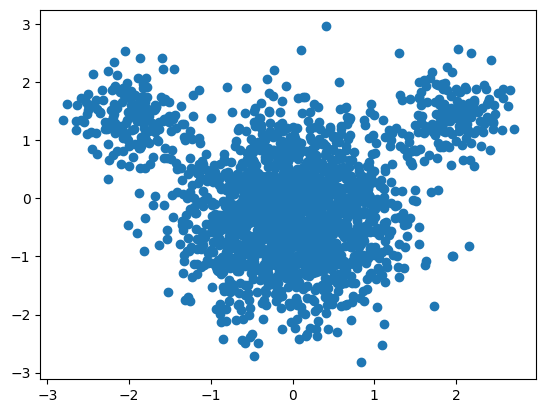

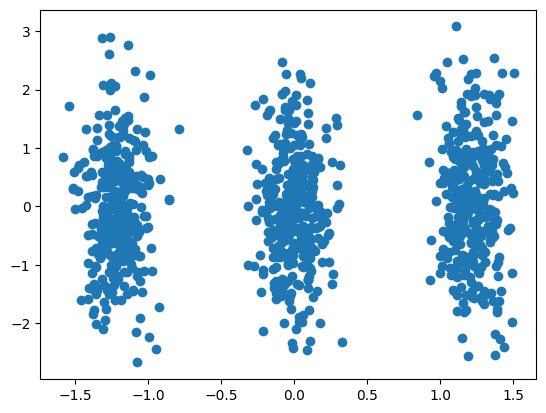

In [26]:
# TODO call functions above and try to find clusters in obtained datasets

mause = read_file("mouse.csv")
lines = read_file("lines.csv")
plot_data(mause)
plot_data(lines)

### 4.2 Now, let's try to use k-means on the obtained dataset. Again, you are given a function to visualize the obtained plot. Your task is to use KMeans with propoer parameters on "mouse" and "lines" datasets and see if the clusters generated by k-means are the same that you suggested in previous exercice.

See documentation and examples: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [27]:
def visualize_clusters(clusters, centroids): 
    #clusters: list of numpy arrays (each array with examples in one cluster)
    #centroids: numpy array
    for c in clusters:
        plt.scatter(c[:,0], c[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.show()

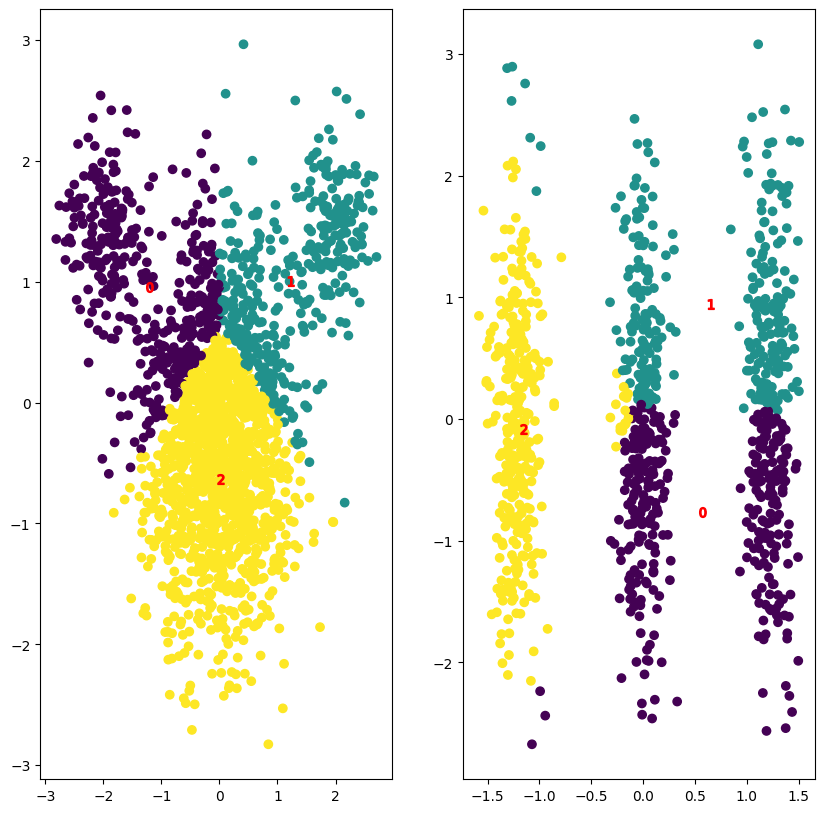

In [47]:
from sklearn.cluster import KMeans
# TODO use KMeans to cluster mouse and lines. Visualize and analyze the obtained clusters.
kmeans_mause = KMeans(n_clusters=3, random_state=0).fit(mause)
labels_mause = kmeans_mause.predict(mause)
centroids_mause = kmeans_mause.cluster_centers_

kmeans_lines = KMeans(n_clusters=3, random_state=0).fit(lines)
labels_lines = kmeans_lines.predict(lines)
centroids_lines = kmeans_lines.cluster_centers_

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].scatter(mause[:, 0], mause[:, 1], c=labels_mause)
ax[1].scatter(lines[:, 0], lines[:, 1], c=labels_lines)

for i, c in enumerate(centroids_lines):
    ax[1].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')

for i, c in enumerate(centroids_mause):
    ax[0].scatter(c[0], c[1], marker='$%d$' % i, s=50, alpha=1, edgecolor='r')




# 5. Attribute selection in unsupervised problems

As in unsupervised learning problems (such as clustering) we do not have decision classess, so attribute selection methods based on info gain, chi2 etc. are not applicable here.

**Question** What can we do when we want to reduce number of features in unsupervised problems?

We will try to use two attribute selection methods, which can be used in clustering (unsupervised learning): removing low-variance attributes and removing correlated attributes.

You are given code which reads real-world dataset containing data about customers and saves it in 'data' data frame. 

**Task** Perform attribute selection using the methods above. Firstly, you can use VarianceThreshold class (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Try different values of threashold and compare how many attributes have been removed. Next, you can use corr() method of DataFrame to obtain the correlation matrix. What can we deduce from this matrix? How can we use it to feature selection? Try to implement proper attribute selection based on correlations.

In [48]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("customers.csv")
data = data.drop(columns="Address")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [65]:
selector = VarianceThreshold(threshold=50)
selector.fit(data)

cols = selector.get_support(indices=True)
selected_columns = data.iloc[:,cols].columns.tolist()
selected_columns
data.corr().style.background_gradient(cmap='coolwarm')


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,1.000000,-0.004447,-0.031113,-0.035146,-0.017675,0.001015,-0.009061,-0.004244,0.014039
Age,-0.004447,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240
Edu,-0.031113,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053
Years Employed,-0.035146,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625
Income,-0.017675,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585
Card Debt,0.001015,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971
Other Debt,-0.009061,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545
Defaulted,-0.004244,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.014039,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000


# Homework

* Write your own implementation of k-means algorithm with random centroid initialization and 2 stopping conditions: max iterations and centroid convergence (if all attributes of all centroids changes not more than some epsilon the algorithm should stop). 
* Use your implementation to cluster data containing data about cereal products with their dietary characteristics (cereals.csv, 16 attributes). 
* It contains some nominal attributes (name, mfr, type). You can omit the first two of them. Type attribute is binary, so you can replace it with values 0 and 1.
* Perform the clustering of the cereals into 3 groups using k-means algorithm. 
* Remember to preprocess the given input: normalization/standarization, attribute selection. 
* Try to describe the obtained groups based on the obtained centroids, what do all cereals within this group have in common?
* Write a report containing information about used preprocessing methods, number of cereals within each cluster and your conclusions about the clustering results.

**Deadline +2 weeks**

In [2]:
import numpy as np
from scipy.spatial import distance
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


class My_Kmeans:
    def __init__(self, number_of_claster: int):
        self.number_of_claster = number_of_claster

    def _count_distance(self, point_1: np.array, point_2: np.array) -> float:
        return distance.euclidean(point_1, point_2)

    def _random_centroid_init(self) -> np.array:
        centroids = np.zeros(shape=(self.number_of_claster, self.number_of_features))
        for centroid_count in range(self.number_of_claster):
            for count_column, column in enumerate(self.data.columns):
                random_value = np.random.uniform(
                    self.data[column].min(), self.data[column].max()
                )
                centroids[centroid_count][count_column] = random_value
        return centroids

    def _claster_asign(self) -> pd.Series:
        claster_assign = pd.DataFrame()
        for number_of_centroid, centroid in enumerate(self.centroids):
            claster_assign[number_of_centroid] = self.data.apply(
                lambda row: self._count_distance(row, centroid), axis=1
            )

        return claster_assign.idxmin(axis=1)

    def count_for_given_number_of_iteration(self):
        for _ in range(self.number_of_iteration):
            claster_assig = self._claster_asign()

            data_with_claster = pd.concat(
                [self.data, claster_assig.rename("class")], axis=1
            )

            self.centroids = data_with_claster.groupby(["class"]).mean().to_numpy()

        return claster_assig

    def count_untile_centroid_change(self):
        
        while True:
            claster_assig = self._claster_asign()

            data_with_claster = pd.concat(
                [self.data, claster_assig.rename("class")], axis=1
            )

            centroids_2 = data_with_claster.groupby(["class"]).mean().to_numpy()

            if ((self.centroids - centroids_2) < 0.001).all():
                self.centroids = centroids_2
                return claster_assig
            self.centroids = centroids_2


    def fit(self, data: pd.DataFrame, number_of_iteration = None) -> np.array:

        self.data = data
        self.number_of_iteration = number_of_iteration
        self.number_of_features = data.shape[1]
        self.centroids = self._random_centroid_init()

        if self.number_of_iteration is not None:
            return self.count_for_given_number_of_iteration()
        else:
            return self.count_untile_centroid_change()

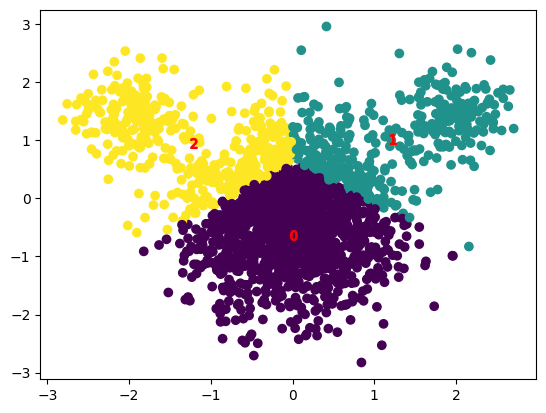

In [14]:
# check if its work in previous data
df_mouse = pd.read_csv("mouse.csv", names=["X", "y"])

df_mouse = StandardScaler().fit_transform(df_mouse)
df_mouse = pd.DataFrame(df_mouse, columns=["X", "Y"])

kmeans_mouse = My_Kmeans(number_of_claster=3)
labels_mause = kmeans_mouse.fit(df_mouse)

plt.scatter(df_mouse.iloc[:, 0], df_mouse.iloc[:, 1], c=labels_mause)
for i, c in enumerate(kmeans_mouse.centroids):
    plt.scatter(c[0], c[1], marker="$%d$" % i, s=50, alpha=1, edgecolor="r")


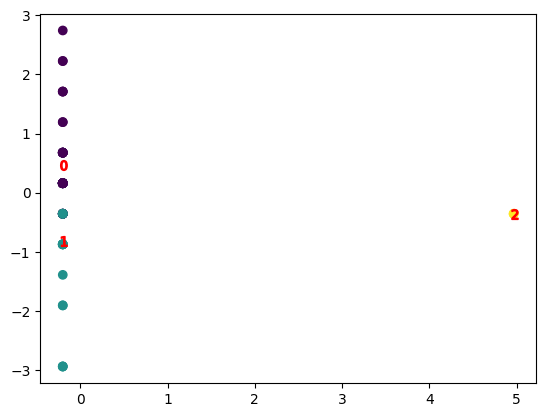

In [16]:
from sklearn.preprocessing import LabelEncoder

df_cereal =pd.read_csv("cereal.csv")
df_cereal = df_cereal.drop(["name", "mfr"], axis = 1)

enc = LabelEncoder()
enc.fit(df_cereal["type"])
df_cereal["type"] = enc.transform(df_cereal["type"])
array = StandardScaler().fit_transform(df_cereal.values)
df_cereal = pd.DataFrame(array, columns=df_cereal.columns)

kmeans_cereal = My_Kmeans(number_of_claster=3)
labels = kmeans_cereal.fit(df_cereal)

plt.scatter(df_cereal.iloc[:, 0], df_cereal.iloc[:, 1], c=labels)
for i, c in enumerate(kmeans_cereal.centroids):
    plt.scatter(c[0], c[1], marker="$%d$" % i, s=50, alpha=1, edgecolor="r")
plt.show()
# nothing interesting to see, too many demension 

In [17]:
df_cereal = pd.concat([df_cereal, labels.rename("class")], axis=1)
df_cereal

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,class
0,-0.201347,-1.905397,1.337319,-0.012988,-0.356306,3.314439,-2.257639,-0.208807,2.596948,-0.14627,0.957813,-0.198067,-2.123870,1.844202,1
1,-0.201347,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.244099,0.549573,-1.27255,0.957813,-0.198067,0.774053,-0.622110,0
2,-0.201347,-1.905397,1.337319,-0.012988,1.204578,2.892113,-1.787170,-0.435260,3.161741,-0.14627,0.957813,-0.198067,-2.123870,1.200922,1
3,-0.201347,-2.938605,1.337319,-1.013072,-0.236238,5.003745,-1.551936,-1.567525,3.302939,-0.14627,0.957813,-0.198067,-1.388576,3.657211,1
4,-0.201347,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.140530,0.244099,-1.370723,-0.14627,0.957813,-0.198067,-0.307262,-0.593365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,-0.201347,0.161019,-0.501495,-0.012988,1.084510,-0.908824,1.506111,-0.888166,-0.509414,-0.14627,0.957813,-0.198067,-0.307262,-0.255058,0
73,-0.201347,0.161019,-1.420902,-0.012988,-0.236238,-0.908824,-0.375764,1.149910,-1.003608,-0.14627,-0.251230,-0.198067,0.774053,-1.068547,0
74,-0.201347,-0.355585,0.417912,-0.012988,0.844374,0.358155,0.565173,-0.888166,0.267176,-0.14627,-1.460273,-0.198067,-0.653283,0.510308,1
75,-0.201347,-0.355585,0.417912,-0.012988,0.484170,0.358155,0.565173,-0.888166,0.196577,-0.14627,-1.460273,-0.198067,0.774053,0.639627,1


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_cereal.iloc[:, :-1])
pca_result.shape


(77, 2)

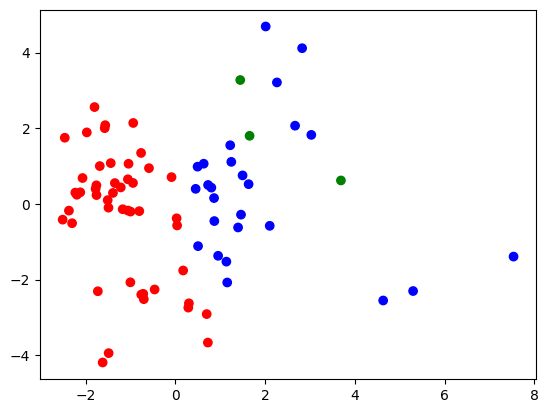

In [19]:
plt.scatter(pca_result[:, 0], pca_result[:, 1], c= df_cereal["class"].map({0:"r", 1:'b', 2:"g"}))

In [22]:
df_cereal.loc[df_cereal["class"] == 2, :]

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,class
20,4.966555,-0.355585,0.417912,-1.013072,-0.956646,-0.486498,1.506111,-1.567525,-1.370723,-1.27255,-0.251230,-0.198067,0.774053,1.566958,2
43,4.966555,-0.355585,1.337319,-0.012988,-1.917189,-0.908824,0.329939,-0.888166,-0.015220,-0.14627,-0.251230,-0.198067,0.774053,0.873130,2
57,4.966555,-0.355585,2.256726,0.987096,-1.917189,0.231457,-3.669045,-1.793978,0.196577,-1.27255,-1.460273,-0.198067,-0.653283,0.584897,2


In [23]:
df_cereal.loc[df_cereal["class"] == 0, :]

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,class
1,-0.201347,0.677623,0.417912,3.987349,-1.737087,-0.064172,-1.551936,0.244099,0.549573,-1.27255,0.957813,-0.198067,0.774053,-0.622110,0
4,-0.201347,0.161019,-0.501495,0.987096,0.484170,-0.486498,-0.140530,0.244099,-1.370723,-0.14627,0.957813,-0.198067,-0.307262,-0.593365,0
5,-0.201347,0.161019,-0.501495,0.987096,0.244034,-0.275335,-0.963850,0.697005,-0.368216,-0.14627,-1.460273,-0.198067,-0.307262,-0.942704,0
6,-0.201347,0.161019,-0.501495,-1.013072,-0.416340,-0.486498,-0.846233,1.602816,-0.933009,-0.14627,-0.251230,-0.198067,0.774053,-0.680121,0
7,-0.201347,1.194228,0.417912,0.987096,0.604238,-0.064172,0.800408,0.244099,0.055379,-0.14627,0.957813,2.009342,-0.307262,-0.403213,0
10,-0.201347,0.677623,-1.420902,0.987096,0.724306,-0.908824,-0.610998,1.149910,-0.862410,-0.14627,-0.251230,-0.198067,-0.307262,-1.764349,0
12,-0.201347,0.677623,-1.420902,1.987181,0.604238,-0.908824,-0.375764,0.470552,-0.721211,-0.14627,-0.251230,-0.198067,-0.307262,-1.636751,0
14,-0.201347,0.161019,-1.420902,-0.012988,0.244034,-0.908824,-0.610998,1.376363,-0.580013,-0.14627,-0.251230,-0.198067,0.774053,-1.428030,0
15,-0.201347,0.161019,-0.501495,-1.013072,1.444714,-0.908824,1.741345,-0.888166,-1.003608,-0.14627,-1.460273,-0.198067,0.774053,-0.087468,0
16,-0.201347,-0.355585,-0.501495,-1.013072,1.564782,-0.486498,1.506111,-1.114619,-0.862410,-0.14627,-1.460273,-0.198067,0.774053,0.229125,0
